In [1]:
%matplotlib inline

import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import scipy as sp
from sklearn.metrics import mean_squared_error
from math import e,sqrt
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Kaggle Recap and Review

by Nicholas Lai, Danielle Sugrue, and Nichole Sun

Maintained by the Statistics Undergraduate Student Association at UC Berkeley

### Table Of Contents

1. [Linear Modeling](#section1)
2. [Data Cleaning](#section2)
3. [Data Visualization](#section3)
4. [Linear Regression](#section4)
5. [Topics in Regression](#section5) <br> 
    4.1 [Ridge Regression](#section5.1) <br> 
    4.2 [LASSO](#section5.2) <br> 
6. [Topics in Classification](#section6) <br> 
    6.1 [kNN](#section6.1) <br> 
    6.2 [Decision Trees](#section6.2) <br> 
    6.3 [Bootstrapping](#section6.3) <br> 
    6.4 [Random Forest](#section6.4) <br> 
7. [Neural Networks](#section7)
8. [Benchmarks for Various Techniques](#section8) <br> 
    8.1 [Feature Engineering](#section8.1) <br>
    8.2 [Data Preprocessing](#section8.2) <br>
    8.3 [Ridge Regression](#section8.3) <br>
    8.4 [LASSO Regression](#section8.4) <br>
    8.5 [Decision Trees](#section8.5) <br>
    8.6 [Random Forest](#section8.6) <br>
    8.7 [kNN](#section8.7) <br>
    8.8 [Neural Network](#section8.8) <br>
9. [Techniques from the Leaderboards](#section9) <br>
    9.1 [Example 1](#section9.1) <br>
    9.2 [Example 2](#section9.2) <br>
    9.3 [Example 3](#section9.3) <br>
10. [Further Reading & Topics](#section10)

Congrats on finishing the last of the models from the CX Kaggle Capstone!

You have now covered a handful of models and corresponding methods and have built a good foundation for yourself in data science! Here's some highlights of what you've covered:

* Linear Models
    * Multivariate Linear Regression
    * Regularization -- Ridge and LASSO
* Decision Trees
    * Entropy
    * Random Forests
* Neural Networks
* Auxiliary Techniques
    * The Data Science Workflow
    * Data Cleaning
    * Data Visualization
    * Classification vs. Regression
    * k Nearest Neighbors
    * Ensemble Learning -- bootstrapping and bagging

Wow, that's a lot! We are really proud of you all for exploring these techniques, which constitute some of Berkeley's toughest machine learning and statistics classes.

<a id='section1'></a>
## Linear Modeling

Recall the first Kaggle lecture -- we were predicting house prices on the Iowa dataset. In order to make predicitions,  it was necessary to devise a model. We decided to create a linear model using _linear regression_. We had 79 features for each house in our dataset, and a lot of the features turned out to not influence house price. In order for us to create the most accurate linear model possible, we needed to clean up our data, and we removed features with the help of data visualizations.

<a id='section2'></a>
## Data Cleaning:

### Train versus Test Set

We split our data into training and testing sets. This is crucial because we need a dataset in order to form our linear model, but we also need to test our linear model on another set to ensure that we are not overfitting to our training set. In general your training set is the "ideal" dataset, which lacks outliers and contains pristine data. Your test set is the data that your model is applied to. For our purposes, we split our data as evenly as possible between training and testing.

### NA Values

There are a variety of ways to deal with NA values:

> Drop rows or columns that have NA values: make sure to distinguish between rows and columns, and decide if removing rows or columns could tarnish your linear model. 
- `train.drop()`, `test.drop()` to drop columns
- `train.drop(train.index[], inplace=True)` to drop rows

> Rename "NA" so your model can digest your dataset: change "NA" to another string so that "NA" is interpreted as a value, and not a lack of value.

Question: How did we distinguish between features that had NA values and features that had NA as an actual meaningful value? (recall Miscellaneous Features vs. Alley)

### Qualitative Features

How do we deal with qualitative features when we are trying to create a linear model that requires numeric inputs?

> __One Hot Encoding__: use `get_dummies` to change qualitative to quantitative values

_One Hot Encoding_

Change the elements in a categorical column from strings to integers (generally starting from 0 and increasing by 1), then create new columns for each unique category. First you are encoding the labels in a column as numbers, and then you are using these new numeric values to create columns which are encoded based on each unique numeric value which return a 1 if the given row contains that feature and a 0 otherwise.

### Scaling

For this dataset, sometimes quantitative features may vary significantly from one another. In these cases, it can be helpful to scale your data so that your linear model will interpret feature values more effectively.

> StandardScaler - subtract the mean and divide by standard deviation
> MaxAbsScaler - transform the absolute values of all the absolute value to [0, 1] bounds 
> We also can take the logarithm of each column value in order to better visualize large variations in our data.
> For years and months, try converting them to be more interpretable. For example, you can number months (1- Jan, 2- Feb,...) and you can subtract years by the earliest year in your dataset. For example, map (2006, 2009, 2004, 2010, 2014, 2014, 2004, 1998) to (8, 11, 6, 12, 16, 16, 6, 0) and the differences between the years will be more significant with respect to their magnitude, making the data more significant for your linear model. 

<a id='section3'></a>
## Data Visualization

The goal of Data Visualization is to illustrate overall patterns and detailed behavior.

We used `Matplotlib` to create our visualizations. Matplotlib is one of the most used Python package for 2D-graphics. It provides both a very quick way to visualize data from Python and create publication-quality figures in many formats.

<a id='section4'></a>
## Linear Regression

Linear regression attempts to model the relationship between two variables by fitting a linear equation to a dataset. The most common technique of fitting a linear equation to data is the __method of least squares__.

The term "least squares" refers to the notion that we are minimizing the squares of the residuals (distance between observed and fitted values on an x-y plane) so that our linear model has the least outliers or smallest squared outlier distance. Note that residuals can only be found if we identify which variable is independent and which is dependent, in which case we compare the linear model's estimated value of the dependent variable and the actual observed value of the dependent variable given the value of the independent variable.

To evaluate our linear model, we try to minimize the root mean squared error loss of our model by comparing the residuals. In this case, linear regression is not going to be a very precise modeling technique so root mean squared error loss is very high.

<a id='section5'></a> 
## Topics in Regression

<a id='section5.1'></a>
### Ridge Regression

Ordinary Least Squares regression methods are only interested in minimising one thing, the Residual Sum of Squares, or $RSS$. This approach has many problems that come up in practical applications, such as being highly sensitive to multicolinearity (if multiple variables give the same info, the variance of your estimates skyrocket) and differences between your training data and your testing data (variance). 

Ridge Regression is a way of dealing with these issues by penalizing large regression coefficients. Large regression coefficients mean that the model "believes" in a strong relationship between the response variable and the explanatory variable. By penalizing large values of regression coefficients, we are telling the model to slow its roll, and to not put as much store in the training data as OLS does. 

Ridge regression minimises: 
$$RSS + \sum_{i\neq0}\lambda\hat{\beta_{i}^2}$$

Where $\lambda$ is some constant. The optimal constant is not known, so it is chosen with cross-validation.

#### Ridge Regression Workflow:

1. Split your data into training and test sets
2. `linear_model.Lasso()` and `model.fit()` for different values of alpha on your training set
3. Get the R^2 of your model on the test set
4. Choose the alpha that minimises this
5. Use your model to make predictions

#### Notes:

Ridge Regression is not really a model selection criterion, for a subtle reason we will discuss in the question section. Do model selection first.

OLS is a poor model when $p>n$ because there are multiple optimal hyperlines that minimise RSS, but Ridge Regression will give you a unique estimate!

#### Questions:

1. What is $\lim_{\lambda\to\infty}\hat{\beta}$ in Ridge Regression? Why is this true? Does this quantity ever actually reach 0?
2. What is $\hat{\beta}$ in Ridge Regression when $\lambda = 0$ in terms of the OLS estimate? Why is this true?

<a id='section5.2'></a>
### LASSO (least absolute shrinkage and selection operator)

LASSO is very similar to Ridge Regression, and is used for much the same purposes. Instead of minimising 

$$RSS + \sum_{i\neq0}\lambda\hat{\beta_{i}^2}$$

LASSO minimises:

$$RSS + \sum_{i\neq0}\lambda|\hat{\beta_{i}|}$$

LASSO therefore penalizes large values of beta coefficients as well, but with a major difference. As $\lambda$ increases, beta coefficients of bad variables will disappear completely, making LASSO a viable variable selection process! This property makes LASSO almost universally preferable, especially in cases where $p>n$, as many useless explanatory variables tend to fall away automatically with the LASSO penalty.

<a id='section6'></a>
## Topics in Classification

<a id='section6.1'></a>
### k-nearest neighbors

#### Implementation:

1. Define a notion of distance
2. For a given observation, take the k-nearest points to the observations from your training set and see which category a plurality of them fall into.
3. Classify the observation as the same as that plurality

The notion of distance you define is very important, and can drastically change the classifications that your algorithm gives. This is also true for the value of k.

This is a very empirical method without many closed-form equations, so the choice of k and the choice of metric are often chosen via cross-validation. 

The justification for KNN relies on the assumption that points close to each other by a metric are classified the same way according to your chosen features. This may seem tautological, but there are many cases where this is not true. For example, classifying political affiliation by a KNN algorithm using income is misguided, as political parties tend to attract people from all over the income spectrum (empirically). So do a sanity check before you implement KNN to see if what you are doing makes sense.

<a id='section6.2'></a>
### Decision Trees

#### Implementation:

1. Calculate the Entropy of your data
2. Draw Boundaries
3. Calculate the Entropy of the data within the boundaries only
4. Sum the Entropies of the bounded data together and compare with the Entropy of the entire set.
5. Cross-validate using many choices of boundary and choose the one with the lowest sum of entropies.

Often, to prevent overfitting, we limit the number of boundaries or splits the decision tree has. The more splits your tree has, the more bias that it contains, in general. 

<a id='section6.3'></a>
### Bootstrapping

Many statistical quantities have no closed form expression, or a very complex one that is difficult to work with (canonical example is the distribution of the median, which often has no formula). To estimate them, we can treat the sample as the population by sampling it with replacement to get new samples. From these samples, we can calculate the empirical value of the quantity of interest (The formula for the median of a distribution often doesn't exist, but actually calculating it from a sample is trivial). Then we get an empirical distribution of the quantity of interest.

A rule of thumb is that Bootstrap estimates are often approximately unbiased when there are no outliers.

#### Question:

I am interested in the kurtosis of an unknown distribution, defined

$$Kurt[X] = E[(\frac{X-\mu}{\sigma})^4]$$

I have a sample of size n from this distribution. How would I use Bootstrap to get an estimate for kurtosis?

<a id='section6.4'></a>
### Random Forest

Bootstrapping is a general method. So general, in fact, that it can even be used to get a "distribution" of decision trees! If you bootstrap the data and get lots of datasets, you can fit a decision tree to each. Then, when you have a new observation, see how each of the decision trees classifies it, and return the most common result. 

This method is called Random Forest, because it entails making lots of trees.

<a id='section7'></a>
## Topics in Neural Networks, Briefly

We talked about feedforward neural networks in the last lecture.

Intuitively, a feedforward neural network can consist of three levels with corresponding neurons:
1. Input Layer: The Input layer has is where $X_i$ from the previous example are inputted. The outputs from the Input layer are just the input $X_i$ and the bias. These are moved into the Hidden Layer.
2. Hidden Layer – The Hidden layers contain neurons that move numbers from the input neurons to the output neurons. They take in the inputs from the input layer. In the running example with car classification, the hidden layers can be items such as "number of seats" or "weight". The hidden layers represent the different steps it takes to classify a vehicle. The number of neurons in the hidden layers are determined by the user. There can be as many hidden layers as necessary depending on the problem.
3. Output Layer – The neurons in the output layer are the results that the NN returns.

The final product will be the output of this model, which is a composition of the activation functions, their weights, plus some bias. The advantages that neural networks have over other models include the fact that that they can easily be made to be non-linear with the correct choice of activation function, and the fact that the weights can be modified with various methods (gradient descent, e.g.) to pursue a better model over time.

<a id='section8'></a>
# Benchmarks for Various Techniques

<a id='section8.1'></a>
## Feature Engineering

In [2]:
trainData = pd.read_csv('./input/train.csv')
y = np.array(trainData['SalePrice']) 
trainData.drop(['Id', 'SalePrice'], axis=1, inplace=True)
testData = pd.read_csv('./input/test.csv')
testData.drop(['Id'], axis=1, inplace=True)
data = pd.concat([trainData, testData])
print(trainData.shape, testData.shape, data.shape)
data.head()

(1460, 79) (1459, 79) (2919, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [3]:
trainAndTest = pd.concat([trainData, testData])
trainAndTest.shape

(2919, 79)

Here, we can define a function to add variables to our dataframe. In general I think this is automated in either `numpy` or `pandas`, but I am unfamiliar with Python.

In [4]:
dfs = [trainData, trainAndTest]
#A function for adding new variables
def addNewFeature(featureName, featureValues):
    for df in dfs:
        if(len(df) == len(trainData)):
            df[featureName] = featureValues[0:len(trainData)]
        else:
            df[featureName] = featureValues
        df[featureName] = df[featureName].astype(int)

Some possible features to add: 

In [5]:
#Remodeled after construction
addNewFeature('RemodAC', np.logical_and(trainAndTest.YearRemodAdd - trainAndTest.YearBuilt, 
                                        trainAndTest.YearBuilt))

In [6]:
#"Age"
addNewFeature('Age', 2008 - trainAndTest.YearBuilt)

In [7]:
#we don't need these features anymore
trainAndTest = trainAndTest.drop(['YearRemodAdd',  'YearBuilt'], axis=1)

<a id='section8.2'></a>
## Data Preprocessing

In [8]:
from scipy.stats import skew

#log transform the target:
y = np.log1p(y)

#log transform skewed numeric features:
numeric_feats = trainAndTest.dtypes[trainAndTest.dtypes != "object"].index

skewed_feats = trainData[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

trainAndTest[skewed_feats] = np.log1p(trainAndTest[skewed_feats])

Dealing with NaN values:

In [9]:
catFswithNaNs = []
for clmn in trainAndTest.loc[:, trainAndTest.dtypes == object]:
    nans =  trainAndTest[clmn].isnull().sum().sum()
    if(nans != 0):
        catFswithNaNs.append(clmn)
        print(clmn + ' NaNs: ', trainAndTest[clmn].isnull().sum().sum())

print('Columns with NaNs: ', len(catFswithNaNs))

MSZoning NaNs:  4
Alley NaNs:  2721
Utilities NaNs:  2
Exterior1st NaNs:  1
Exterior2nd NaNs:  1
MasVnrType NaNs:  24
BsmtQual NaNs:  81
BsmtCond NaNs:  82
BsmtExposure NaNs:  82
BsmtFinType1 NaNs:  79
BsmtFinType2 NaNs:  80
Electrical NaNs:  1
KitchenQual NaNs:  1
Functional NaNs:  2
FireplaceQu NaNs:  1420
GarageType NaNs:  157
GarageFinish NaNs:  159
GarageQual NaNs:  159
GarageCond NaNs:  159
PoolQC NaNs:  2909
Fence NaNs:  2348
MiscFeature NaNs:  2814
SaleType NaNs:  1
Columns with NaNs:  23


In [10]:
catFsWithNaNCategory = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                        'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
                        'PoolQC', 'Fence', 'MiscFeature']
for clmn in catFsWithNaNCategory:
    trainAndTest.loc[trainAndTest[clmn].isnull(), clmn] = 'No' + clmn

In [11]:
#For categorical data, replace with most common value
catFswithNaNs = [clmn for clmn in catFswithNaNs if clmn not in catFsWithNaNCategory]
for clmn in catFswithNaNs:
    mcvOfClmn = trainAndTest[clmn].value_counts().idxmax()
    trainAndTest.loc[trainAndTest[clmn].isnull(), clmn] = mcvOfClmn

In [12]:
trainAndTest = pd.get_dummies(trainAndTest)

In [13]:
a = trainAndTest.loc[np.logical_not(trainAndTest["LotFrontage"].isnull()), "LotArea"]
b = trainAndTest.loc[np.logical_not(trainAndTest["LotFrontage"].isnull()), "LotFrontage"]
# plt.scatter(x, y)
t = (a <= 25000) & (b <= 150)
p = np.polyfit(a[t], b[t], 1)
trainAndTest.loc[trainAndTest['LotFrontage'].isnull(), 'LotFrontage'] = np.polyval(p,
                                    trainAndTest.loc[trainAndTest['LotFrontage'].isnull(), 'LotArea'])

In [14]:
# trainAndTest = trainAndTest.fillna(trainAndTest.mean())
# Filling in missing values with column means

from sklearn.preprocessing import Imputer

toImpute = list(trainAndTest.columns)

imp = Imputer(missing_values = 'NaN', strategy='mean', axis=0)
tmp = imp.fit_transform(trainAndTest[toImpute])

i = 0
for clmn in toImpute:
    trainAndTest[clmn] = tmp[:, i]
    i+=1

In [16]:
#Final touches before applying estimators
from sklearn.model_selection import train_test_split
X_train_val = trainAndTest[:trainData.shape[0]]
X_train, X_val, y_train,y_val= train_test_split(X_train_val,y, test_size=0.33,random_state = 1)
X_test = trainAndTest[trainData.shape[0]:]

<a id='section8.3'></a>
## Ridge Regression

In [20]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv =4))
    return(rmse)

In [21]:
model_ridge = Ridge()
def ridge_model_evaluation(alphas):
    cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]
    cv_ridge = pd.Series(cv_ridge, index = alphas)
    cv_ridge.plot(title = "Ridge")
    plt.xlabel("alpha")
    plt.ylabel("rmse")
    plt.show()

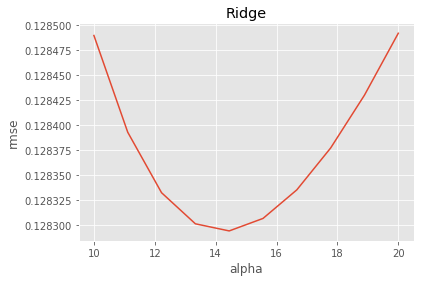

In [26]:
alphas = list(np.linspace(10, 20, 10))
ridge_model_evaluation(alphas)

In [28]:
model_ridge = Ridge(alpha=15.3)
model_ridge.fit(X_train, y_train)
print('CV-4: ', np.mean(rmse_cv(model_ridge)))

CV-20:  0.12830225409365242


In [29]:
y_val_pred = model_ridge.predict(X_val)
rmse = sqrt(mean_squared_error(e**y_val,e**y_val_pred))
print("RMSE with Ridge:", rmse)

RMSE with LASSO: 27539.10651242213


<a id='section8.4'></a>
## LASSO Regression

In [30]:
model_lasso = Lasso()
def lasso_model_evaluation(alphas):
    cv_lasso = [rmse_cv(Lasso(alpha = alpha)).mean() for alpha in alphas]
    cv_lasso = pd.Series(cv_lasso, index = alphas)
    cv_lasso.plot(title = "Lasso")
    plt.xlabel("alpha")
    plt.ylabel("rmse")
    plt.show()

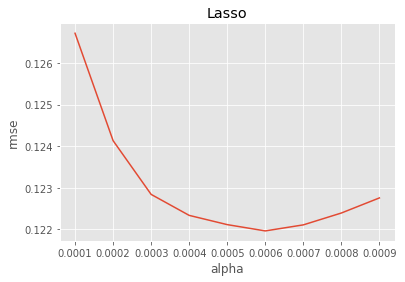

In [31]:
alphas = list(np.arange(0.0001, 0.001, 0.0001))
lasso_model_evaluation(alphas)

In [34]:
model_lasso = Lasso(alpha=0.0006)
model_lasso.fit(X_train, y_train)
print('CV-4: ', np.mean(rmse_cv(model_lasso)))

CV-20:  0.12196378008433656


In [35]:
y_val_pred = model_lasso.predict(X_val)
rmse = sqrt(mean_squared_error(e**y_val,e**y_val_pred))
print("RMSE with LASSO:", rmse)

RMSE with LASSO: 24890.309985452375


<a id='section8.5'></a>
## Decision Trees

In [36]:
from sklearn.tree import DecisionTreeRegressor

model_tree = DecisionTreeRegressor()

def DTR_model_evaluation(max_depths):
    cv_tree = [rmse_cv(DecisionTreeRegressor(max_depth = md)).mean() for md in max_depths]
    cv_tree = pd.Series(cv_tree, index = max_depths)
    cv_ridge.plot(title = "DecisionTreeRegressor")
    plt.xlabel("max_depth")
    plt.ylabel("rmse")
    plt.show()

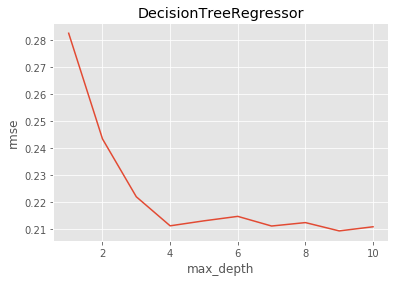

In [37]:
max_depths = list(np.arange(1, 11, 1))
DTR_model_evaluation(max_depths)

In [38]:
model_tree = DecisionTreeRegressor(max_depth=4)
model_tree.fit(X_train, y_train)
print('CV-4: ', np.mean(rmse_cv(model_tree)))

CV-4:  0.21119008628976124


In [39]:
y_val_pred = model_tree.predict(X_val)
rmse = sqrt(mean_squared_error(e**y_val,e**y_val_pred))
print("RMSE with Decision Tree:", rmse)

RMSE with Decision Tree: 44613.18240996864


<a id='section8.6'></a>
## Random Forest

Note: This will take eons to run, the CV score is 0.14ish

In [53]:
from sklearn.ensemble import RandomForestRegressor

model_forest = RandomForestRegressor()

def RFR_model_evaluation(estimatorsL):
    cv_forest = [rmse_cv(RandomForestRegressor(n_estimators = estimators, n_jobs=-1,criterion='mse',max_depth=100)).mean() \
                for estimators in estimatorsL]
    cv_forest = pd.Series(cv_forest, index = estimatorsL)
    cv_forest.plot(title = "RandomForestRegressor")
    plt.xlabel("n_estimator")
    plt.ylabel("rmse")
    plt.show()

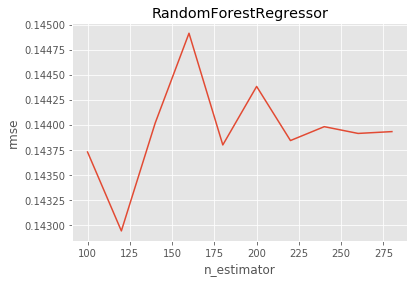

In [59]:
estimatorsL = list(np.arange(80, 200, 20))
RFR_model_evaluation(estimatorsL)

In [62]:
model_forest = RandomForestRegressor(n_estimators=120, n_jobs=-1,criterion='mse',max_depth=200)
model_forest.fit(X_train, y_train)
print('CV-4: ', np.mean(rmse_cv(model_forest)))

CV-4:  0.14347831285822704


In [63]:
y_val_pred = model_forest.predict(X_val)
rmse = sqrt(mean_squared_error(e**y_val,e**y_val_pred))
print("RMSE with Random Forest:", rmse)

RMSE with Random Forest: 29086.348320292123


<a id='section8.7'></a>
## kNN

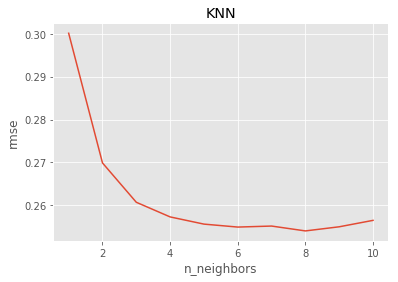

In [60]:
from sklearn import neighbors

model_knn = neighbors.KNeighborsRegressor()

def KNN_model_evaluation(n_neighbors):
    cv_knn = [rmse_cv(neighbors.KNeighborsRegressor(n_neighbors = md)).mean() for md in n_neighbors]
    cv_knn = pd.Series(cv_knn, index = n_neighbors)
    cv_knn.plot(title = "KNN")
    plt.xlabel("n_neighbors")
    plt.ylabel("rmse")
    plt.show()
    
n_neighbors = list(np.arange(1, 11, 1))
KNN_model_evaluation(n_neighbors)

In [64]:
model_knn = neighbors.KNeighborsRegressor(n_neighbors = 5)
model_knn.fit(X_train, y_train)
print('CV-4: ', np.mean(rmse_cv(model_knn)))

CV-4:  0.2555975559805024


In [65]:
y_val_pred = model_knn.predict(X_val)
rmse = sqrt(mean_squared_error(e**y_val,e**y_val_pred))
print("RMSE with kNN:", rmse)

RMSE with Random Forest: 53516.06272888747


KNN. Very suspicious. Far and away the worst performing model of the bunch. Maybe some of you made it work?

# XGBOOST

In [82]:
from sklearn.ensemble import GradientBoostingRegressor

model_boost = GradientBoostingRegressor()

def boosting_model_evaluation(estimatorsL):
    cv_boosting = [rmse_cv(GradientBoostingRegressor(n_estimators = estimators,max_depth=80)).mean() \
                for estimators in estimatorsL]
    cv_boosting = pd.Series(cv_boosting, index = estimatorsL)
    cv_boosting.plot(title = "GradientBoostingRegressor")
    plt.xlabel("n_estimator")
    plt.ylabel("rmse")
    plt.show()

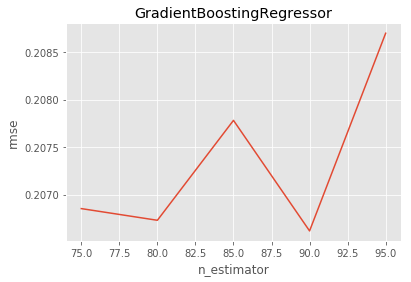

In [83]:
estimatorsL = list(np.arange(75,100,5))
boosting_model_evaluation(estimatorsL)

In [85]:
model_boost = GradientBoostingRegressor(n_estimators=90,max_depth=80)
model_boost.fit(X_train, y_train)
print('CV-4: ', np.mean(rmse_cv(model_forest)))

CV-4:  0.14526603826437534


In [86]:
y_val_pred = model_boost.predict(X_val)
rmse = sqrt(mean_squared_error(e**y_val,e**y_val_pred))
print("RMSE with Gradient Boosting:", rmse)

RMSE with Gradient Boosting: 42525.0283575811


# Neural Networks

In [130]:
#Function that returns root mean squared error
from keras import backend as K
import keras
from keras.models import Sequential
from keras.layers import Dense
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [219]:
model_nn = Sequential()
model_nn.add(Dense(100, activation='relu', input_shape=(20,)))
#model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='relu'))
model_nn.add(Dense(1, activation='relu'))


In [220]:
# For a multi-class classification problem
model_nn.compile(optimizer='adam',
              loss='mse')

In [224]:
model_nn.fit(x=X_train.iloc[:,:20].values, y=y_train, epochs=5, batch_size=10)

Epoch 1/5
978/978 [==============================] - 0s 119us/step - loss: 0.0620
Epoch 2/5
978/978 [==============================] - 0s 125us/step - loss: 0.0613
Epoch 3/5
978/978 [==============================] - 0s 117us/step - loss: 0.0667
Epoch 4/5
978/978 [==============================] - 0s 116us/step - loss: 0.0576
Epoch 5/5
978/978 [==============================] - 0s 151us/step - loss: 0.0658


In [225]:
result = model_nn.evaluate(x=X_train.iloc[:,:20], y=y_train)
print("Evaluation error: ",result)

978/978 [==============================] - 0s 19us/step
Evaluation error:  0.057242724122689055


In [226]:
y_val_pred = model_nn.predict(X_val.iloc[:,:20])
rmse = sqrt(mean_squared_error(e**y_val,e**y_val_pred))
print("RMSE with Neural Network:", rmse)

RMSE with Neural Network: 46216.711252677036


## Works Cited

https://www.kaggle.com/sherafgan/lin-r-methods-decision-tree-random-forest-0-121

https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

<a id='section8.8'></a>
## Neural Network

https://www.kaggle.com/diegosiebra/neural-network-model-for-house-prices-keras

# Your Turn!

We are all excited to see what you've done for the Kaggle competition! We would like to go around the room and ask each group what methods you used for the challenge, what challenges you faced, and how well you ultimately did. Please participate, because the groups with the best performing solution will get a prize!

Come up to the podium, plug in your computer, and explain your model on screen.

<a id='section9'></a>
# Techniques from the Leaderboards

<a id='section9.1'></a>
## Example 1
### Transform

This participant states the key point is to to log_transform the numeric variables since most of them are skewed. He does this by taking log(feature + 1), making the features more normal. The reason he gives for this transformation is that most of the machine learning algorithms work better if the features have a normal distribution (https://stats.stackexchange.com/questions/18844/when-and-why-should-you-take-the-log-of-a-distribution-of-numbers). 

Read more about their strategy here! https://www.kaggle.com/apapiu/regularized-linear-models

<a id='section9.2'></a>
## Example 2: 0.10943
### Manual adjustment

One participant explains how he used brute force to land on the leaderboards. He knew that regression would often fail in edge cases where the predictors were very small or very large. He took final predictions for log of sales and plotted them against logs of real values as you can see below.

<img src="files/logplot.png">
Source: https://www.kaggle.com/agehsbarg/top-10-0-10943-stacking-mice-and-brutal-force

This plot confirmed what he expected about the edge cases, as sales were overestimated for small final predictions and sales were underestimated for large values of final predictions. To combat this, he used brute force by taking the top and bottom percentiles of the predicted sales and manually increased or decreased the forecasts. Essentially, he manually adjusted at the extremes. This allowed him to move onto the leaderboard with a score of 0.10943.

If you want to read more in depth about what they did, you can check out their notebook here: https://www.kaggle.com/agehsbarg/top-10-0-10943-stacking-mice-and-brutal-force.

<a id='section9.3'></a>
## Example 3: 0.11421
### Numerical to Categorical

After cleaning his data, this participant converted some numerical features into categorical features and recommended using LabelEncoder and get_dummies for these features.

<img src="files/categorical.png">
Source: https://www.kaggle.com/massquantity/all-you-need-is-pca-lb-0-11421-top-4

### Mistake

One mistake that was caught by another member is that this participant replaced the missing values with substituted data using the full dataset that he created when joining the test and train dataset. This is an issue because now this takes the observations of both the training and test into account. This violates the separation of one's test and training data by incorporating total dataset information.

For example, take a look at this snippet of code:

<img src="files/mistake.png">
Source: https://www.kaggle.com/massquantity/all-you-need-is-pca-lb-0-11421-top-4

This code is meant to fill in the selected columns with the mode of them. However, one can see that this participant ended up using the full dataset and so they are taking the mode of the values in both the training and test dataset.

This is a very typical mistake and one should be careful not to do the same!

If you want more details on their process, read through their notebook here: https://www.kaggle.com/massquantity/all-you-need-is-pca-lb-0-11421-top-4

<a id='section10'></a>
# Further Reading & Topics

* General model selection techniques: [AIC](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=16&ved=2ahUKEwj05MGkqO_eAhW-JTQIHQl1Cg0QFjAPegQIDBAC&url=http%3A%2F%2Fstatweb.stanford.edu%2F~jtaylo%2Fcourses%2Fstats203%2Fnotes%2Fselection.pdf&usg=AOvVaw3s66HL1yMIZRvy1A5kMW7y), AICc, and BIC
* [Logit and Probit models](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=13&ved=2ahUKEwih9-TjqO_eAhUoHzQIHTJdAwwQFjAMegQICRAC&url=http%3A%2F%2Fwww.columbia.edu%2F~so33%2FSusDev%2FLecture_9.pdf&usg=AOvVaw1IYCAt3W7q8RxZ29oyaYFZ) for categorical linear regression
* [Time Series Models and Analysis](https://otexts.org/fpp2/arima.html)
* [Principal Component Analysis](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c)
* [XGBoost](https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/)

# That's all folks! 

We've reached the end of a long semester. Getting to know you all and to introduce you to the world of statistical computing has been as much of a journey for us as it has undoubtedly been for many of you. We hope that your participation in SUSA has given you the tools to begin to pursue your goals in statistics and beyond. We can't imagine the things that you'll go on to achieve, but it's our hope that you will continue to pursue those things in SUSA next semester. 

Sincerely,

Your Friends at the Education Committee <3